In [2]:
from __future__ import absolute_import, division, print_function

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub
import os

from tensorflow.keras import layers

tf.VERSION

W0516 09:07:37.440336 140680668841792 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


'1.13.1'

In [3]:
data_root = tf.keras.utils.get_file(
  'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)

228818944/228813984 [==============================] - 74s 0us/step


##### Pre processing

In [4]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(str(data_root))

Found 3670 images belonging to 5 classes.


Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step
Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 7')

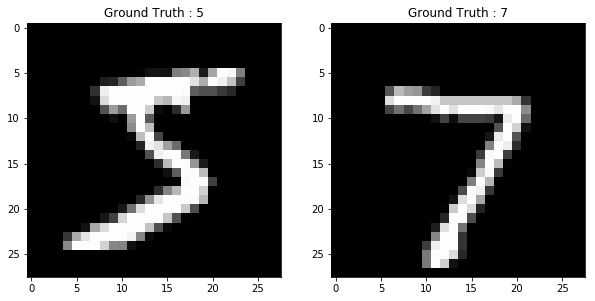

In [5]:
from keras.datasets import mnist
import numpy as np
data_root2 = mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data_root2
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [6]:
#os.listdir(data_root2)
print(train_labels)

[5 0 4 ... 5 6 8]


##### Not part of totorial

In [7]:
os.listdir(data_root)

['LICENSE.txt', 'sunflowers', 'tulips', 'dandelion', 'daisy', 'roses']

In [8]:
print(data_root)

/home/jovyan/.keras/datasets/flower_photos


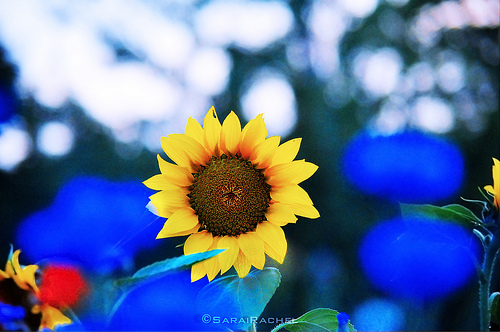

In [9]:
from IPython.display import Image
Image(data_root +'/sunflowers/7820398908_4316bbba45.jpg')

In [10]:
for image_batch,label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 256, 256, 3)
Label batch shape:  (32, 5)


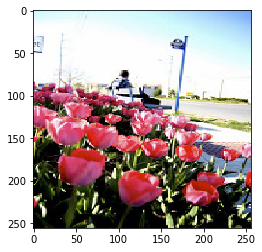

In [11]:
from matplotlib import pyplot as plt
plt.imshow(image_batch[31,:,:,:], interpolation='nearest')
plt.show()

###### Until here

In [12]:
classifier_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/2" #@param {type:"string"}
def classifier(x):
  classifier_module = hub.Module(classifier_url)
  return classifier_module(x)
  
IMAGE_SIZE = hub.get_expected_image_size(hub.Module(classifier_url))

Instructions for updating:
Colocations handled automatically by placer.


W0516 09:09:01.500735 140680668841792 deprecation.py:323] From /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [13]:
classifier_layer = layers.Lambda(classifier, input_shape = IMAGE_SIZE+[3])
classifier_model = tf.keras.Sequential([classifier_layer])
classifier_model.summary()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0516 09:09:06.437279 140680668841792 saver.py:1483] Saver not created because there are no variables in the graph to restore


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 1001)              0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [14]:
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SIZE)
for image_batch,label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Found 3670 images belonging to 5 classes.
Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 5)


In [15]:
import tensorflow.keras.backend as K
sess = K.get_session()
init = tf.global_variables_initializer()

sess.run(init)

In [16]:
print(IMAGE_SIZE)

[224, 224]


65536/61306 [================================] - 0s 1us/step


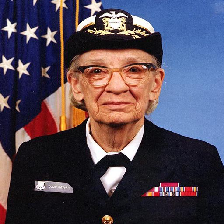

In [17]:
import numpy as np
import PIL.Image as Image

grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SIZE)
grace_hopper 

In [18]:
grace_hopper = np.array(grace_hopper)/255.0
grace_hopper.shape

(224, 224, 3)

In [19]:
result = classifier_model.predict(grace_hopper[np.newaxis, ...])
result.shape

(1, 1001)

In [20]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

653

In [21]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

16384/10484 [==============================================] - 0s 0us/step


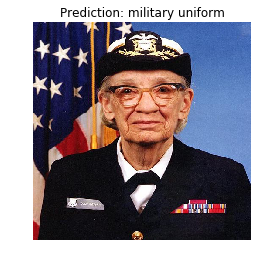

In [22]:
plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name)

In [23]:
result_batch = classifier_model.predict(image_batch)

In [24]:
labels_batch = imagenet_labels[np.argmax(result_batch, axis=-1)]
labels_batch

array(['sea urchin', 'rapeseed', 'daisy', 'sea urchin', 'paintbrush',
       'daisy', 'daisy', 'vase', 'chain', 'vase', 'mailbox', 'daisy',
       'honeycomb', 'sea urchin', 'daisy', 'bee', 'head cabbage', 'daisy',
       'daisy', 'bee', 'paper towel', 'bee', 'daisy', 'quill', 'vase',
       'cardoon', 'pot', 'artichoke', 'velvet', 'harvestman', 'cardoon',
       'daisy'], dtype='<U30')

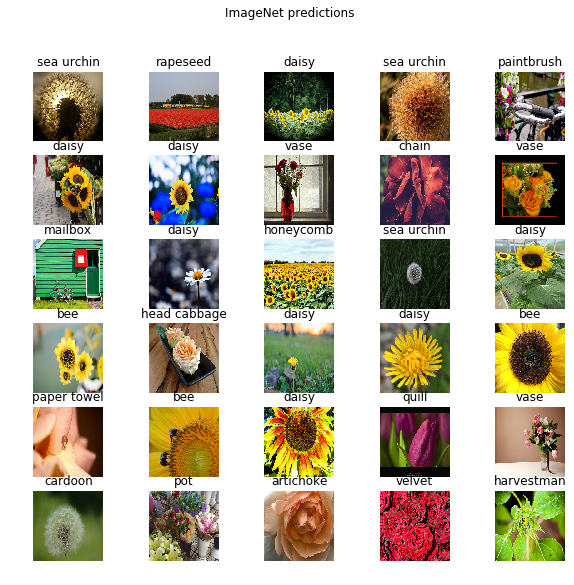

In [25]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(labels_batch[n])
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions")

###### Transfer learning:

In [26]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/2" #@param {type:"string"}
def feature_extractor(x):
  feature_extractor_module = hub.Module(feature_extractor_url)
  return feature_extractor_module(x)

IMAGE_SIZE = hub.get_expected_image_size(hub.Module(feature_extractor_url))

In [27]:
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SIZE)
for image_batch,label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Labe batch shape: ", label_batch.shape)
  break

Found 3670 images belonging to 5 classes.
Image batch shape:  (32, 224, 224, 3)
Labe batch shape:  (32, 5)


In [28]:
features_extractor_layer = layers.Lambda(feature_extractor, input_shape=IMAGE_SIZE+[3])
features_extractor_layer.trainable = False

In [29]:
model = tf.keras.Sequential([
  features_extractor_layer,
  layers.Dense(image_data.num_classes, activation='softmax')
])
model.summary()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0516 09:09:19.012900 140680668841792 saver.py:1483] Saver not created because there are no variables in the graph to restore


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 6,405
Trainable params: 6,405
Non-trainable params: 0
_________________________________________________________________


In [30]:
init = tf.global_variables_initializer()
sess.run(init)
result = model.predict(image_batch)
result.shape

(32, 5)

In [31]:
model.compile(
  optimizer=tf.train.AdamOptimizer(), 
  loss='categorical_crossentropy',
  metrics=['accuracy'])

In [32]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []
    
  def on_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])

In [33]:
steps_per_epoch = image_data.samples//image_data.batch_size
batch_stats = CollectBatchStats()
model.fit((item for item in image_data), epochs=1, 
                    steps_per_epoch=steps_per_epoch,
                    callbacks = [batch_stats])

Instructions for updating:
Use tf.cast instead.


W0516 09:09:24.267236 140680668841792 deprecation.py:323] From /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


114/114 [==============================] - 82s 722ms/step - loss: 0.6545 - acc: 0.7598


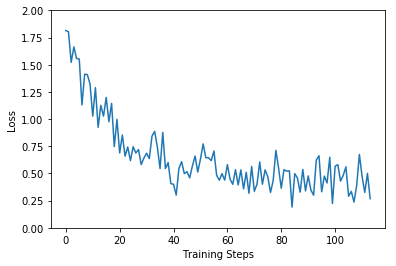

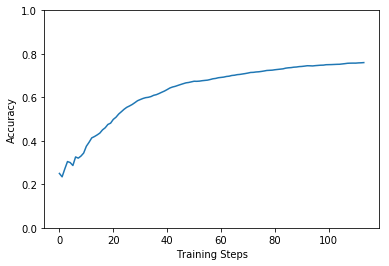

In [34]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats.batch_losses)

plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats.batch_acc)

In [35]:
label_names = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
label_names = np.array([key.title() for key, value in label_names])
label_names

array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

In [36]:
result_batch = model.predict(image_batch)

labels_batch = label_names[np.argmax(result_batch, axis=-1)]
labels_batch

array(['Tulips', 'Tulips', 'Tulips', 'Daisy', 'Sunflowers', 'Roses',
       'Daisy', 'Roses', 'Dandelion', 'Sunflowers', 'Sunflowers',
       'Tulips', 'Daisy', 'Daisy', 'Roses', 'Tulips', 'Daisy', 'Roses',
       'Tulips', 'Daisy', 'Roses', 'Dandelion', 'Sunflowers', 'Dandelion',
       'Sunflowers', 'Dandelion', 'Daisy', 'Tulips', 'Tulips',
       'Dandelion', 'Dandelion', 'Daisy'], dtype='<U10')

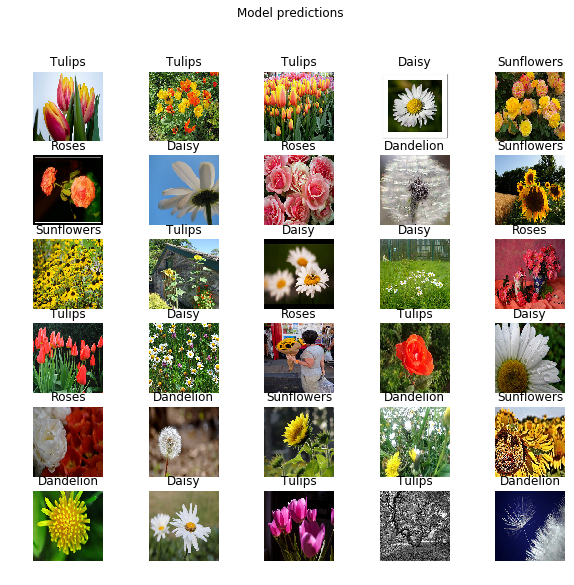

In [37]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(labels_batch[n])
  plt.axis('off')
_ = plt.suptitle("Model predictions")

In [38]:
export_path = tf.contrib.saved_model.save_keras_model(model, "./saved_models")


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.


W0516 09:10:56.496423 140680668841792 deprecation.py:323] From /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:1436: update_checkpoint_state (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0516 09:10:59.282761 140680668841792 saver.py:1483] Saver not created because there are no variables in the graph to restore


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


W0516 09:11:01.027491 140680668841792 deprecation.py:323] From /opt/conda/lib/python3.7/site-packages/tensorflow/python/saved_model/signature_def_utils_impl.py:257: build_tensor_info (from tensorflow.python.saved_model.utils_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


I0516 09:11:01.029607 140680668841792 export.py:587] Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


I0516 09:11:01.031660 140680668841792 export.py:587] Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


I0516 09:11:01.033181 140680668841792 export.py:587] Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']


I0516 09:11:01.035129 140680668841792 export.py:587] Signatures INCLUDED in export for Train: ['train']


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


I0516 09:11:01.036418 140680668841792 export.py:587] Signatures INCLUDED in export for Eval: None


W0516 09:11:01.038048 140680668841792 tf_logging.py:161] Export includes no default signature!


INFO:tensorflow:No assets to save.


I0516 09:11:02.325677 140680668841792 builder_impl.py:629] No assets to save.


INFO:tensorflow:No assets to write.


I0516 09:11:02.328303 140680668841792 builder_impl.py:124] No assets to write.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0516 09:11:04.469742 140680668841792 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


I0516 09:11:05.341363 140680668841792 export.py:587] Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


I0516 09:11:05.343034 140680668841792 export.py:587] Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


I0516 09:11:05.344557 140680668841792 export.py:587] Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


I0516 09:11:05.346008 140680668841792 export.py:587] Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']


I0516 09:11:05.347629 140680668841792 export.py:587] Signatures INCLUDED in export for Eval: ['eval']


W0516 09:11:05.349401 140680668841792 tf_logging.py:161] Export includes no default signature!


INFO:tensorflow:No assets to save.


I0516 09:11:05.728564 140680668841792 builder_impl.py:629] No assets to save.


INFO:tensorflow:No assets to write.


I0516 09:11:05.730749 140680668841792 builder_impl.py:124] No assets to write.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0516 09:11:08.480225 140680668841792 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


I0516 09:11:09.150866 140680668841792 export.py:587] Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


I0516 09:11:09.154559 140680668841792 export.py:587] Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']


I0516 09:11:09.155885 140680668841792 export.py:587] Signatures INCLUDED in export for Predict: ['serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Train: None


I0516 09:11:09.159347 140680668841792 export.py:587] Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


I0516 09:11:09.162085 140680668841792 export.py:587] Signatures INCLUDED in export for Eval: None


INFO:tensorflow:No assets to save.


I0516 09:11:09.568788 140680668841792 builder_impl.py:629] No assets to save.


INFO:tensorflow:No assets to write.


I0516 09:11:09.570720 140680668841792 builder_impl.py:124] No assets to write.


INFO:tensorflow:SavedModel written to: ./saved_models/1557997855/saved_model.pb


I0516 09:11:09.868108 140680668841792 builder_impl.py:414] SavedModel written to: ./saved_models/1557997855/saved_model.pb


In [39]:
export_path

b'./saved_models/1557997855'

##### Feed forward network

In [40]:
model = tf.keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(np.prod(IMAGE_SIZE),)),
    layers.Dense(512, activation='relu'),
    layers.Dense(image_data.num_classes, activation='softmax')])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               25690624  
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 2565      
Total params: 25,955,845
Trainable params: 25,955,845
Non-trainable params: 0
_________________________________________________________________


In [41]:
steps_per_epoch = image_data.samples//image_data.batch_size
batch_stats = CollectBatchStats()
model.fit((item for item in image_data), epochs=1, 
                    steps_per_epoch=steps_per_epoch,
                    callbacks = [batch_stats])

ValueError: Error when checking input: expected dense_1_input to have 2 dimensions, but got array with shape (32, 224, 224, 3)

In [ ]:
print(image_data)

In [ ]:
print(type(image_data))
print(image_data.subset)
print(IMAGE_SIZE)

In [ ]:
print(np.prod(IMAGE_SIZE))
train_images.shape[1:]